In [1]:
from keras import models, layers, optimizers, losses, metrics, datasets
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
# Load the Boston housing price regression dataset
(train_data, train_labels), (test_data, test_labels) = datasets.boston_housing.load_data()

Features
0. Per capita crime rate.
1. Proportion of residential land zoned for lots over 25,000 square feet.
2. Proportion of non-retail business acres per town.
3. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
4. Nitric oxides concentration (parts per 10 million).
5. Average number of rooms per dwelling.
6. Proportion of owner-occupied units built prior to 1940.
7. Weighted distances to five Boston employment centres.
8. Index of accessibility to radial highways.
9. Full-value property-tax rate per $10,000.
10. Pupil-teacher ratio by town.
11. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
12. % lower status of the population.


In [3]:
# Re-normalize the data to zero mean and unit variance
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [4]:
# Construct and train a fully connected model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',  input_shape=(train_data.shape[1],)))
model.add(layers.Dense(96, activation='relu'))
model.add(layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 96)                6240      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 97        
Total params: 7,233
Trainable params: 7,233
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile and train the model
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,
              metrics=[metrics.mae, metrics.mse])
history = model.fit(train_data, train_labels, epochs=100, validation_split=0.25, verbose=False)

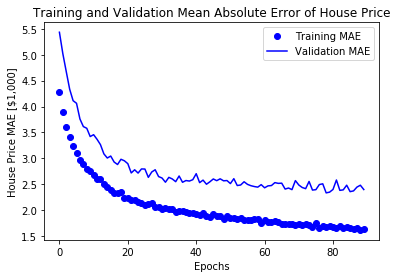

In [6]:
# Plot mean absolute error
history_dict = history.history
mae_values = history_dict['mean_absolute_error'][10:]
val_mae_values = history_dict['val_mean_absolute_error'][10:]
plt.plot(range(len(mae_values)), mae_values, 'bo', label='Training MAE')
plt.plot(range(len(val_mae_values)), val_mae_values, 'b', label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error of House Price')
plt.xlabel('Epochs')
plt.ylabel('House Price MAE [$1,000]')
plt.legend()
plt.show()

In [7]:
# Evaluate model on the test data
model.fit(train_data, train_labels, epochs=100, verbose=False)
test_loss, test_mae, test_mse = model.evaluate(test_data, test_labels, verbose=False)
print("Housing Price MAE is ${:,.0f}".format(test_mae * 1_000))

Housing Price MAE is $2,497
